# Decision Tree

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

- Ajustar el modelo a un Decision Tree

- Extraer las métricas

- Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

In [6]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('once')

import sys
sys.path.append("../../")
from src import funciones as fun
from src import variables as var
pd.options.display.max_columns = None

## 1º: Decision Tree Label

In [7]:
df_label = pd.read_pickle('../archivos/country_label.pkl')
df_label.sample()

,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary,basic_boxcox,country_label
2204,Pakistan,-0.970333,-0.561441,-0.875,-0.578035,-1.043478,-0.769091,-1.14127,-1.551601,-0.571429,-0.401204,-0.439104,-0.818309,-0.692308,-0.877313,-0.918033,-0.525168,-0.079782,-0.939198,-0.539555,-0.500174,-0.787825,-0.569728,-0.513281,-0.604355,142


In [8]:
Xl = df_label.drop(['basic_boxcox', 'country', 'basic'], axis = 1)
yl = df_label["basic"]

In [9]:
xl_train, xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size = 0.3, random_state = 42)

In [10]:
arbol = DecisionTreeRegressor(random_state = 0) 

In [11]:
arbol.fit(xl_train, yl_train) 

DecisionTreeRegressor(random_state=0)

In [12]:
# fig = plt.figure(figsize = (10,6))
# tree.plot_tree(arbol, feature_names = xl_train.columns, filled = True)
# plt.show() 

In [13]:
max_features = np.sqrt(len(xl_train.columns))
max_features

4.795831523312719

In [14]:
print(arbol.tree_.max_depth)

33


In [15]:
yl_pred_test_dt = arbol.predict(xl_test)
yl_pred_train_dt = arbol.predict(xl_train)

In [16]:
dt_resultsl = fun.metricas(yl_test, yl_train, yl_pred_test_dt, yl_pred_train_dt, "Decission Tree Label")
dt_resultsl

,MAE,MSE,RMSE,R2,set,modelo
0,4.424041e-01,4.866278e-01,6.975872e-01,0.014296,test,Decission Tree Label
1,2.130265e-19,1.478168e-35,3.844695e-18,1.000000,train,Decission Tree Label


En este modelo tenemos un claro overfitting.

## Probamos con el encondig GET DUMMIES

In [17]:
df_dummie = pd.read_pickle('../archivos/country_dummie.pkl')
df_dummie.sample()

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary,basic_boxcox,country_pesos,country_Afghanistan,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Anguilla,country_Antigua And Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bosnia And Herzegovina,country_Botswana,country_Brazil,country_British Virgin Islands,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Cape Verde,country_Chad,country_Chile,country_China,country_Colombia,country_Congo,country_Cook Islands,country_Costa Rica,country_Croatia,country_Cuba,country_Curacao,country_Cyprus,country_Czech Republic,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Falkland Islands,country_Faroe Islands,country_Fiji,country_Finland,country_France,country_French Guiana,country_French Polynesia,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Gibraltar,country_Greece,country_Greenland,country_Guadeloupe,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Iraq,country_Ireland,country_Isle Of Man,country_Israel,country_Italy,country_Ivory Coast,country_Jamaica,country_Japan,country_Jersey,country_Jordan,country_Kazakhstan,country_Kenya,country_Kosovo (Disputed Territory),country_Kuwait,country_Kyrgyzstan,country_Laos,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Liechtenstein,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Marshall Islands,country_Martinique,country_Mauritania,country_Mauritius,country_Mexico,country_Moldova,country_Monaco,country_Mongolia,country_Montenegro,country_Montserrat,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Caledonia,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_North Macedonia,country_Norway,country_Oman,country_Pakistan,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Qatar,country_Reunion,country_Romania,country_Russia,country_Rwanda,country_Saint Helena,country_Saint Kitts And Nevis,country_Saint Lucia,country_Saint Vincent And The Grenadines,country_Samoa,country_San Marino,country_Sao Tome And Principe,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Sint Maarten,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Korea,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syria,country_Taiwan,country_Tajikistan,country_Tanzania,country_Thailand,country_Timor-Leste,country_Togo,country_Trinidad And Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Turks And Caicos Islands,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
1162,-1.062678,-0.527778,-0.1875,-0.624277,-0.84058,-0.5

In [18]:
Xd = df_dummie.drop(['basic_boxcox', 'basic'], axis = 1)
yd = df_dummie["basic"]

In [19]:
xd_train, xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size = 0.2, random_state = 42)

In [20]:
arbold = DecisionTreeRegressor(random_state = 0) 

In [21]:
arbold.fit(xd_train, yd_train) 

DecisionTreeRegressor(random_state=0)

In [22]:
max_features = np.sqrt(len(xd_train.columns))
max_features

15.198684153570664

In [23]:
print(arbold.tree_.max_depth)

35


In [24]:
yd_pred_test_dt = arbold.predict(xd_test)
yd_pred_train_dt = arbold.predict(xd_train)

In [25]:
dt_resultsd = fun.metricas(yd_test, yd_train, yd_pred_test_dt, yd_pred_train_dt, "Decission Tree Dummie 1")
dt_resultsd

,MAE,MSE,RMSE,R2,set,modelo
0,4.085831e-01,3.699387e-01,6.082259e-01,0.252958,test,Decission Tree Dummie 1
1,1.922077e-19,4.142582e-35,6.436289e-18,1.000000,train,Decission Tree Dummie 1


In [26]:
# definimos un diccionario con los hiperparámetros

paramd1 = {"max_depth": [13,15,17,19],
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [27]:
gsd = GridSearchCV(
            estimator=DecisionTreeRegressor(), 
            param_grid= paramd1, 
            cv=10, 
            verbose=-1,
            return_train_score = True, 
            scoring="neg_mean_squared_error")

In [28]:
gsd.fit(xd_train, yd_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [13, 15, 17, 19],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [29]:
modelo_dummie = gsd.best_estimator_
modelo_dummie

DecisionTreeRegressor(max_depth=15, max_features=4, min_samples_leaf=10,
                      min_samples_split=10)

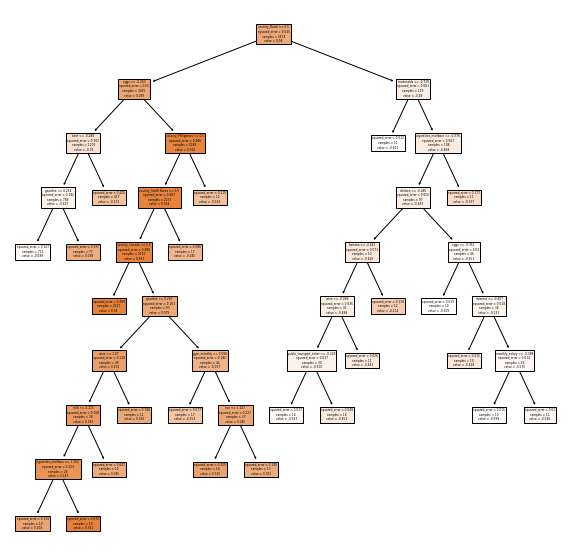

In [30]:
fig = plt.figure(figsize=(10, 10))
tree.plot_tree(modelo_dummie, feature_names=xd_train.columns, filled=True);

In [31]:
yd_pred_test_dt2 = modelo_dummie.predict(xd_test)
yd_pred_train_dt2 = modelo_dummie.predict(xd_train)

In [32]:
dt_results2d = fun.metricas(yd_test, yd_train, yd_pred_test_dt2, yd_pred_train_dt2, "Decission Tree 2 Dummie")
dt_results2d

,MAE,MSE,RMSE,R2,set,modelo
0,0.429459,0.347106,0.589157,0.299065,test,Decission Tree 2 Dummie
1,0.436892,0.385391,0.620799,0.292854,train,Decission Tree 2 Dummie


## Probamos con el encondig al que le dimos un orden manualmente

In [33]:
df_orden = pd.read_pickle('../archivos/country_pesos.pkl')
df_orden.head()

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary,basic_boxcox,country_pesos
0,-0.219373,0.601852,2.395833,1.046243,1.304348,0.747273,4.294342,3.245552,0.307692,1.218954,0.504901,-0.338160,-0.153846,-0.258103,0.245902,0.465023,-0.302919,1.074934,0.208531,0.101671,1.262442,0.904358,0.517125,0.397744,1
1,-0.350427,0.625000,3.520833,-0.289017,-0.014493,-0.292727,0.338771,0.241993,-0.142857,1.035948,-0.462312,-0.319477,-0.408284,-0.691550,-0.131148,-0.534202,-0.439942,1.455932,0.053956,1.617468,2.248014,0.750069,-0.004580,-0.617292,0
2,-0.552707,0.421296,1.791667,-0.398844,-0.384058,-0.490909,0.148560,0.014235,-0.285714,0.570261,-0.454115,-0.293321,-0.532544,-0.744625,-0.147541,-0.588840,-0.450326,-0.011987,0.053956,0.335639,2.036034,-0.045124,-0.090119,-0.698365,0
3,-0.923077,-0.069444,-0.625000,-0.514451,-0.934783,-0.505455,-0.656716,-1.081851,-0.461538,0.315359,0.627852,-0.181224,-0.597633,-0.797701,0.114754,-0.727198,-0.635978,-0.452562,-0.564346,-0.358551,-0.390842,-0.034428,-0.324674,-0.930884,0
4,-0.746439,-0.398148,-0.666667,-0.502890,-0.884058,-0.483636,-0.690038,-0.967972,-0.450549,0.315359,0.029491,-0.181224,-0.455621,-0.877313,-0.065574,-0.602435,-0.670930,-0.661335,-0.475392,-0.409781,-0.590637,-0.371835,-0.347005,-0.719354,0


In [34]:
Xo = df_orden.drop(['basic_boxcox', 'basic'], axis = 1)
yo = df_orden["basic"]

In [35]:
xo_train, xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size = 0.3, random_state = 42)

In [36]:
arbolo = DecisionTreeRegressor(random_state = 0) 

In [37]:
arbolo.fit(xo_train, yo_train) 

DecisionTreeRegressor(random_state=0)

In [38]:
max_features = np.sqrt(len(xo_train.columns))
max_features

4.795831523312719

In [39]:
print(arbolo.tree_.max_depth)

31


In [40]:
yo_pred_test_dt = arbolo.predict(xo_test)
yo_pred_train_dt = arbolo.predict(xo_train)

In [41]:
dt_resultso = fun.metricas(yo_test, yo_train, yo_pred_test_dt, yo_pred_train_dt, "Decission Tree Orden 1")
dt_resultso

,MAE,MSE,RMSE,R2,set,modelo
0,4.323555e-01,4.719384e-01,6.869777e-01,0.04405,test,Decission Tree Orden 1
1,1.331416e-19,1.256443e-35,3.544634e-18,1.00000,train,Decission Tree Orden 1


Unimos las métricas de todos nuestros modelos:

In [42]:
metricas_decision_tree = pd.concat([dt_resultsl, dt_resultsd, dt_results2d, dt_resultso], axis = 0)

In [43]:
metricas_decision_tree

,MAE,MSE,RMSE,R2,set,modelo
0,4.424041e-01,4.866278e-01,6.975872e-01,0.014296,test,Decission Tree Label
1,2.130265e-19,1.478168e-35,3.844695e-18,1.000000,train,Decission Tree Label
0,4.085831e-01,3.699387e-01,6.082259e-01,0.252958,test,Decission Tree Dummie 1
1,1.922077e-19,4.142582e-35,6.436289e-18,1.000000,train,Decission Tree Dummie 1
0,4.294585e-01,3.471063e-01,5.891573e-01,0.299065,test,Decission Tree 2 Dummie
1,4.368916e-01,3.853910e-01,6.207987e-01,0.292854,train,Decission Tree 2 Dummie
0,4.323555e-01,4.719384e-01,6.869777e-01,0.044050,test,Decission Tree Orden 1
1,1.331416e-19,1.256443e-35,3.544634e-18,1.000000,train,Decission Tree Orden 1


En todos nuestros decision tree nos encontramos con que tenemos overfitting (el train esta sobreaprendiendo y no es capaz de hacer predicciones).

In [44]:
metricas_decision_tree.to_csv('../archivos/metricas_decision_tree.csv')